In [1]:
%%capture
%pip install torch==2.2.1+cu118 --index-url https://download.pytorch.org/whl/cu118
%pip install C:\Users\ncccc\Desktop\LAVIS
%pip install -r C:\Users\ncccc\Desktop\LAVIS\requirements.txt

In [2]:
import torch

from PIL import Image
from omegaconf import OmegaConf

from lavis.models import load_model_and_preprocess
from lavis.models import model_zoo
from lavis.common.registry import registry

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
print(torch.__version__)
print(torch.cuda.is_available())

2.2.1+cu118
True


In [4]:
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
model, vis_preprocess, txt_preprocess = load_model_and_preprocess("blip_diffusion", "base", device=device, is_eval=True)

  deprecate("config-passed-as-path", "1.0.0", deprecation_message, standard_warn=False)



No ctx_embeddings_cache found in C:\Users\ncccc/.cache\torch\hub\checkpoints\blip-diffusion


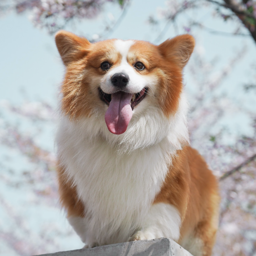

In [5]:
cond_subject = "dog"
src_subject = "cat"
tgt_subject = "dog"

text_prompt = "sit on sofa"

src_subject = txt_preprocess["eval"](src_subject)
tgt_subject = txt_preprocess["eval"](tgt_subject)
cond_subject = txt_preprocess["eval"](cond_subject)
text_prompt = [txt_preprocess["eval"](text_prompt)]

cond_image = Image.open("../images/dog.png").convert("RGB")
display(cond_image.resize((256, 256)))
cond_image = vis_preprocess["eval"](cond_image).unsqueeze(0).cuda()

src_image = Image.open("../images/cat-sofa.png").convert("RGB")

samples = {
    "cond_images": cond_image,
    "cond_subject": cond_subject,
    "src_subject": src_subject,
    "tgt_subject": tgt_subject,
    "prompt": text_prompt,
    "raw_image": src_image,
}

In [6]:
iter_seed = 88871
guidance_scale = 7.5
num_inference_steps = 50
num_inversion_steps = 50 # increase to improve DDIM inversion quality
negative_prompt = "over-exposure, under-exposure, saturated, duplicate, out of frame, lowres, cropped, worst quality, low quality, jpeg artifacts, morbid, mutilated, out of frame, ugly, bad anatomy, bad proportions, deformed, blurry, duplicate"

output = model.edit(
    samples,
    seed=iter_seed,
    guidance_scale=guidance_scale,
    num_inference_steps=num_inference_steps,
    num_inversion_steps=num_inversion_steps,
    neg_prompt=negative_prompt,
)

print("=" * 30)
print("Before editing:")
display(output[0])

print("After editing:")
display(output[1])

  deprecate("config-passed-as-path", "1.0.0", deprecation_message, standard_warn=False)



ValueError: You have to specify either input_ids